<a href="https://colab.research.google.com/github/Rafikul10/Predicting-Blood-Analysis/blob/main/Predicting_Blood_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Blood Analysis**
Objective - Here i will predict whether or not a donor will give blood the next time the vehicle comes to campus.

About Dataset - I took this DataSet from Kaggle.

Link : https://www.kaggle.com/datasets/bonastreyair/predicting-blood-analysis

-It's a supervised classifier problem statement so, here i used RandomForestClassifier algorithm to predict on test data.
I devided thw data into 3 set one for training one for testing and one for hyperperameter tuning.

In [72]:
#import libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
#import train and test data
trn_data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Predicting_Blood/blood-train.csv")
tst_data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Predicting_Blood/blood-test.csv")

In [74]:
#display data
display(trn_data.head(10))

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
5,335,4,4,1000,4,0
6,47,2,7,1750,14,1
7,164,1,12,3000,35,0
8,736,5,46,11500,98,1
9,436,0,3,750,4,0


In [75]:
display(tst_data.head(10))

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34
5,500,3,21,5250,42
6,530,4,2,500,4
7,244,14,1,250,14
8,249,23,2,500,87
9,728,14,4,1000,64


In [76]:
#concat of train and test data
data = pd.concat([trn_data,tst_data])

In [77]:
data.shape

(776, 6)

In [78]:
data.isnull().sum()

Unnamed: 0                       0
Months since Last Donation       0
Number of Donations              0
Total Volume Donated (c.c.)      0
Months since First Donation      0
Made Donation in March 2007    200
dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   776 non-null    int64  
 1   Months since Last Donation   776 non-null    int64  
 2   Number of Donations          776 non-null    int64  
 3   Total Volume Donated (c.c.)  776 non-null    int64  
 4   Months since First Donation  776 non-null    int64  
 5   Made Donation in March 2007  576 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 42.4 KB


In [80]:
#Observation-- no missing values in any variables and all the 
#variables are int or float don't have nay object variable

In [81]:
#Lets split the data into train test 
from sklearn.model_selection import train_test_split

#first split the data into train test--
train_data = data.iloc[:576,:]
test_data = data.iloc[576:776,:]
x_test=test_data.drop(columns={"Made Donation in March 2007"},axis=1)
print("Data split into train and test.")

#split features and labels of train data
x=train_data.iloc[:,:5]
y=train_data.iloc[:,5:6]
print("train data split into features and labels.")


#now split the train data into train and val --
x_train,x_val,y_train,y_val = train_test_split(x,y, test_size=0.1, random_state=42)
print("Shape of x_rain data:",x_train.shape)
print("Shape of y_train data:",y_train.shape)
print("Shape of x_val data:",x_val.shape)
print("Shape of y_val data:",y_val.shape)
print("Shape of x_test:",x_test.shape)

Data split into train and test.
train data split into features and labels.
Shape of x_rain data: (518, 5)
Shape of y_train data: (518, 1)
Shape of x_val data: (58, 5)
Shape of y_val data: (58, 1)
Shape of x_test: (200, 5)


In [82]:
#Pipeline Create
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn import set_config
set_config(display="diagram")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [83]:
#Pipeline create for numerical values
numerical_pipeline = Pipeline([
    ("sim_imputer",SimpleImputer(strategy="mean")),
    ("scaler",StandardScaler())
])
#categorical_pipeline = Pipeline([
#    ("ohe",OneHotEncoder(handle_unknown="ignore")),
#    ])
#find numerical variables
num_cols = [col for col in x_train.columns if x_train[col].dtype != "O"]
print("List of catenumericalgoricaal variables:",num_cols)
cat_cols = [col for col in x_train.columns if (x_train[col].dtypes=='O') & (col!='education')]
print("List of categoricaal variables:",cat_cols)

#add both numerical and categorical column
preprocessing =ColumnTransformer([
    ("Numerical",numerical_pipeline,num_cols),
    #("categorical",categorical_pipeline,cat_cols),
    ])
print("Add numerical and categorical pipeline.")

final_pipeline = Pipeline([
    ("preprocessing",preprocessing),
    ("RF_clf",RandomForestClassifier())
    ])
print("Algorithm added to final_pipeline")

#Feed the train data to model
final_pipeline.fit(x_train,y_train)

#now find best params useing gridsearch csv
param_grid =param_grid = { 
    'RF_clf__n_estimators': [200, 500],
    'RF_clf__max_features': ['auto', 'sqrt', 'log2'],
    'RF_clf__max_depth' : [4,5,6,7,8],
    'RF_clf__criterion' :['gini', 'entropy']
    }
#added all params to grid search cv
RF_grd = GridSearchCV(final_pipeline,param_grid,cv=5,scoring="accuracy")

#feed x_val data to gridsearchcv
RF_grd.fit(x_val,y_val)

#find best params for RandomForestClassifier
print("Best estimator:",RF_grd.best_estimator_)
#find best params
print("Best estimator:",RF_grd.best_params_)

#add best params to the model
final_pipeline = RF_grd.best_estimator_
print("Best estimator and best params fit to the model pipeline!")

#now predict on test data
test_prediction=final_pipeline.predict(x_test)
print("prediction done in test data!")

List of catenumericalgoricaal variables: ['Unnamed: 0', 'Months since Last Donation', 'Number of Donations', 'Total Volume Donated (c.c.)', 'Months since First Donation']
List of categoricaal variables: []
Add numerical and categorical pipeline.
Algorithm added to final_pipeline


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

Best estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('sim_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0',
                                                   'Months since Last Donation',
                                                   'Number of Donations',
                                                   'Total Volume Donated '
                                                   '(c.c.)',
                                                   'Months since First '
                                                   'Donation'])])),
                ('RF_clf',
                 RandomForestCl

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#prediction on x_val data
x_val_prediction=final_pipeline.predict(x_val)

#Accuracy check of test data
accuracy = accuracy_score(y_val,x_val_prediction)*100
print("Accuracy of the model:",accuracy)

#Mean squared error checking
mse = mean_squared_error(y_val,x_val_prediction)
print("Mean squared error:",mse)
#Mean absolute error checking
mae = mean_absolute_error(y_val,x_val_prediction)
print("Mean absolute error:",mae)
#Root squared error checking
rmse = np.sqrt(mean_squared_error(y_val,x_val_prediction))
print("Root squared error:",rmse)

con_matrix = confusion_matrix(y_val,x_val_prediction)
print("confusion matrix of x_val data:",con_matrix)

Accuracy of the model: 100.0
Mean squared error: 0.0
Mean absolute error: 0.0
Root squared error: 0.0
confusion matrix of x_val data: [[42  0]
 [ 0 16]]


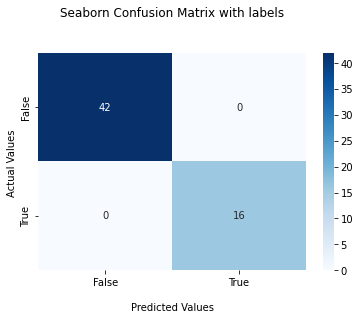

In [85]:
ax = sns.heatmap(con_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [86]:
#it's giving me the 100% accuracy on val data cuz i used that data to hyperparameter tuning
#we dont have test data labels so can't check the accuracy after predict on test data

In [87]:
#create dataframe of unnamed: 0 and predicted values
Final_result =pd.DataFrame({"ID":x_test["Unnamed: 0"],"Made Donation in March 2007":test_prediction})
display(Final_result.head(10))

,ID,Made Donation in March 2007
0,659,1.0
1,276,0.0
2,263,0.0
3,303,0.0
4,83,1.0
5,500,1.0
6,530,0.0
7,244,0.0
8,249,0.0
9,728,0.0


**Model Pickle**

In [88]:
#import pickle
import pickle
pickle.dump(final_pipeline,open("blood_donation.pkl","wb"))
blood_donation_load=pickle.load(open("blood_donation.pkl","rb"))